In [1]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [2]:
dados.head(10)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [3]:
labels = {
    "expected_hours":"horas",
    "price":"preco",
    "unfinished":"nao_finalizado"
}
dados = dados.rename(columns=labels)

In [4]:
dados.head()

,nao_finalizado,horas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
dados["finalizado"] = dados["nao_finalizado"].map({0:1,1:0})

In [6]:
dados.head()

,nao_finalizado,horas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


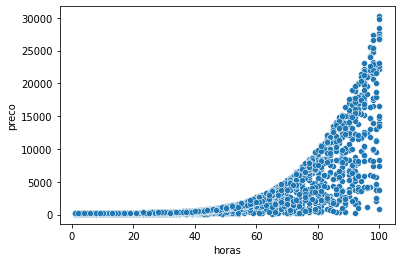

In [7]:
import seaborn as sns
sns.scatterplot(x="horas", y="preco",data=dados)

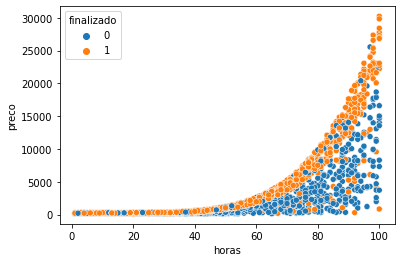

In [8]:
sns.scatterplot(x="horas", y="preco",data=dados, hue="finalizado")

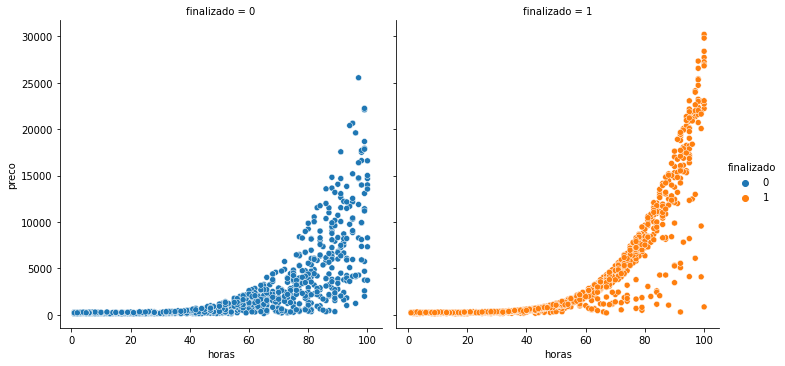

In [9]:
sns.relplot(x="horas", y="preco",data=dados, hue="finalizado", col="finalizado")

In [12]:
x = dados[["horas", "preco"]]
y = dados["finalizado"]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# SEED controla a aleatoriedade da separação dos dados
# stratify diz que o algoritmo deve estratificar a amostra com base na classificação (Y)
SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify = y)
# Treinando o modelo
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model = LinearSVC()
model.fit(train_x, train_y)

previsoes = model.predict(test_x)
accuracy_score(test_y, previsoes)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6444444444444445

In [13]:
len(test_x)

540

In [14]:
# Acuracia de linha de base (baseline)
previsoes_de_base = np.ones(540)
accuracy_score(test_y, previsoes_de_base)

0.5259259259259259

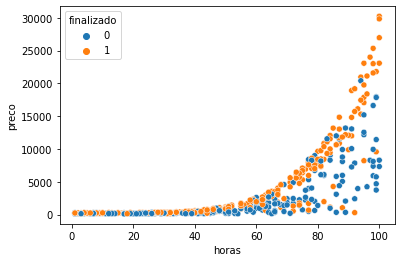

In [15]:
sns.scatterplot(x="horas", y="preco",data=test_x, hue=test_y)


In [16]:
x_min = test_x.horas.min()
x_max = test_x.horas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()

In [17]:
# Criando uma grade de pixels devidamente espaçada
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / 100)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / 100)
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
pontos


array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [18]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

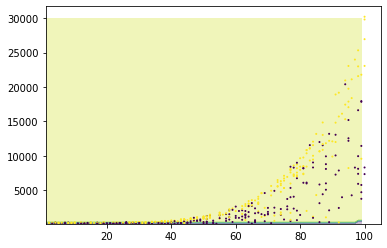

In [19]:
# Plotando
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas, test_x.preco, c=test_y, s=1)

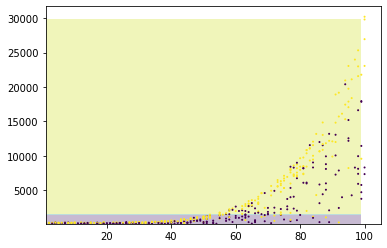

In [25]:
# Utilizando outro metodo n linear
from sklearn.svm import SVC
model = SVC()
model.fit(train_x, train_y)

# Criando uma grade de pixels devidamente espaçada
x_min = test_x.horas.min()
x_max = test_x.horas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / 100)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / 100)
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas, test_x.preco, c=test_y, s=1)

In [27]:
from sklearn.preprocessing import StandardScaler


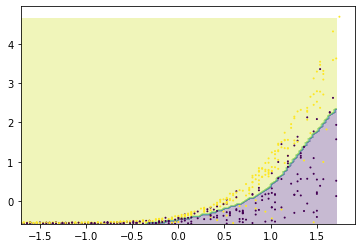

In [38]:
# Utilizando outro metodo n linear
from sklearn.svm import SVC

#Precisamos remodelar os maximos e mínimos, pois agora, não temos um df padrão.
data_x = test_x[:,0] # primeira coluna
data_y = test_x[:,1] # segunda coluna

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

#Cria um escalador
scaler = StandardScaler()
scaler.fit(train_x) # treina
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

#Cria um modelo não linear
model = SVC()
model.fit(train_x, train_y)

# Criando uma grade de pixels devidamente espaçada
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / 100)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / 100)
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)